In [1]:
from decode_diagrams import create_yolo_model, create_text_model, decode_diagram_image, draw_boxes, draw_digital_diagram
from PIL import Image

In [2]:
# Create yolo model
yolo_model_path = "models/Yolov5s_best.pt"
yolo_model = create_yolo_model(yolo_model_path)

Creating yolo model from models/Yolov5s_best.pt


YOLOv5  2023-10-31 Python-3.10.11 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
# Create text model
text_model_path = "models/TRBA_best_accuracy.pth"
converter, text_model, AlignCollate_demo = create_text_model(text_model_path)

Creating text model from models/TRBA_best_accuracy.pth
loading pretrained model from models/TRBA_best_accuracy.pth


In [4]:
# Get test images
import os
from PIL import Image

dir_of_images = "test_images"

image_path_list = list(filter(lambda x: "jpg" in x or "png" in x or "jpeg" in x, os.listdir(dir_of_images))) 
images = [Image.open(os.path.join(dir_of_images, image_path)) for image_path in image_path_list]

In [5]:
outcomes = decode_diagram_image(images, yolo_model, text_model, converter, AlignCollate_demo, object_thresh=0.5)

In [6]:
drawn_images = [draw_boxes(outcomes[i], img) for i, img in enumerate(images)]
final_images = [draw_digital_diagram(outcomes[i], img) for i, img in enumerate(images)]

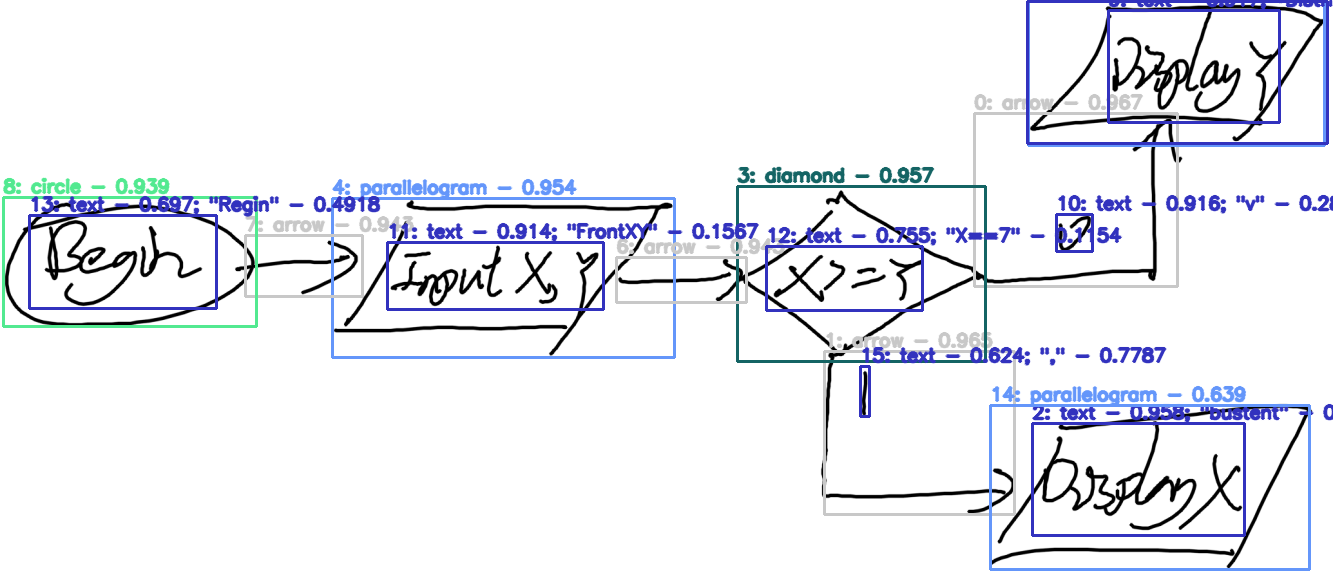

In [7]:
drawn_images[0]

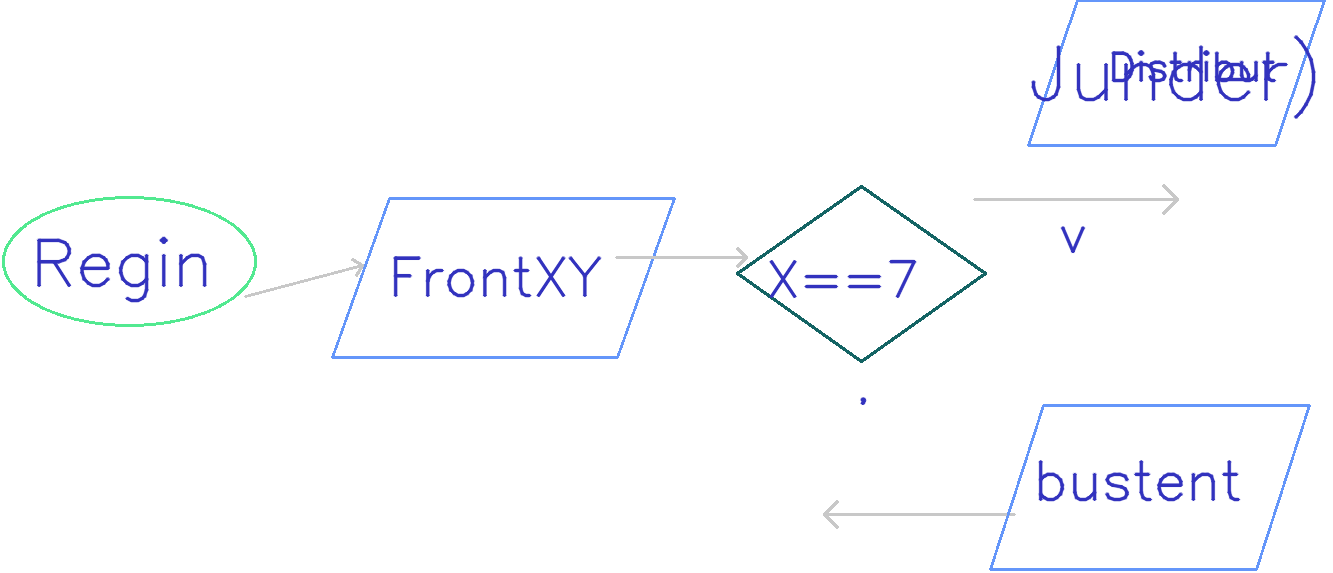

In [8]:
final_images[0]

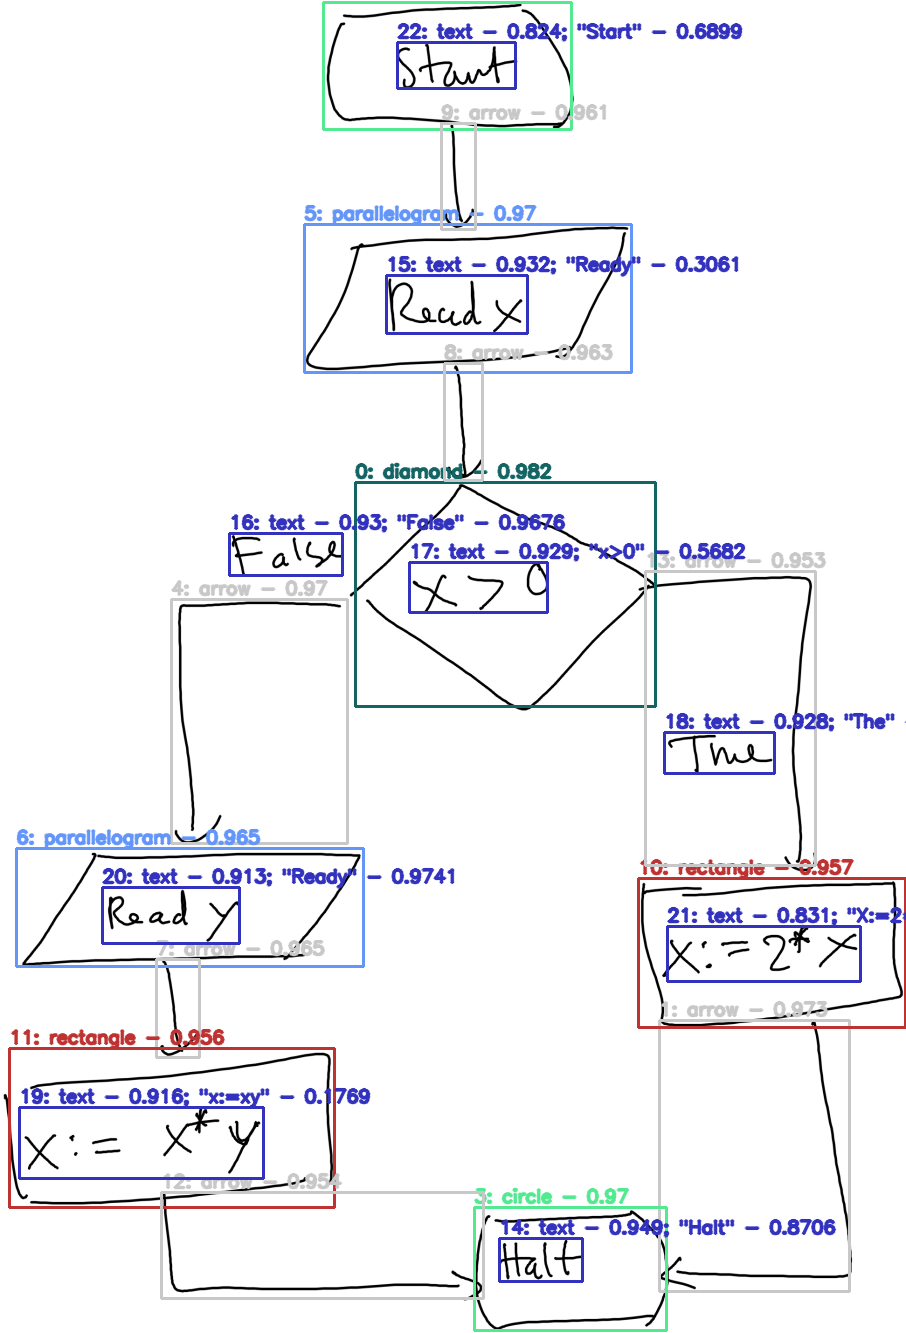

In [9]:
drawn_images[1]

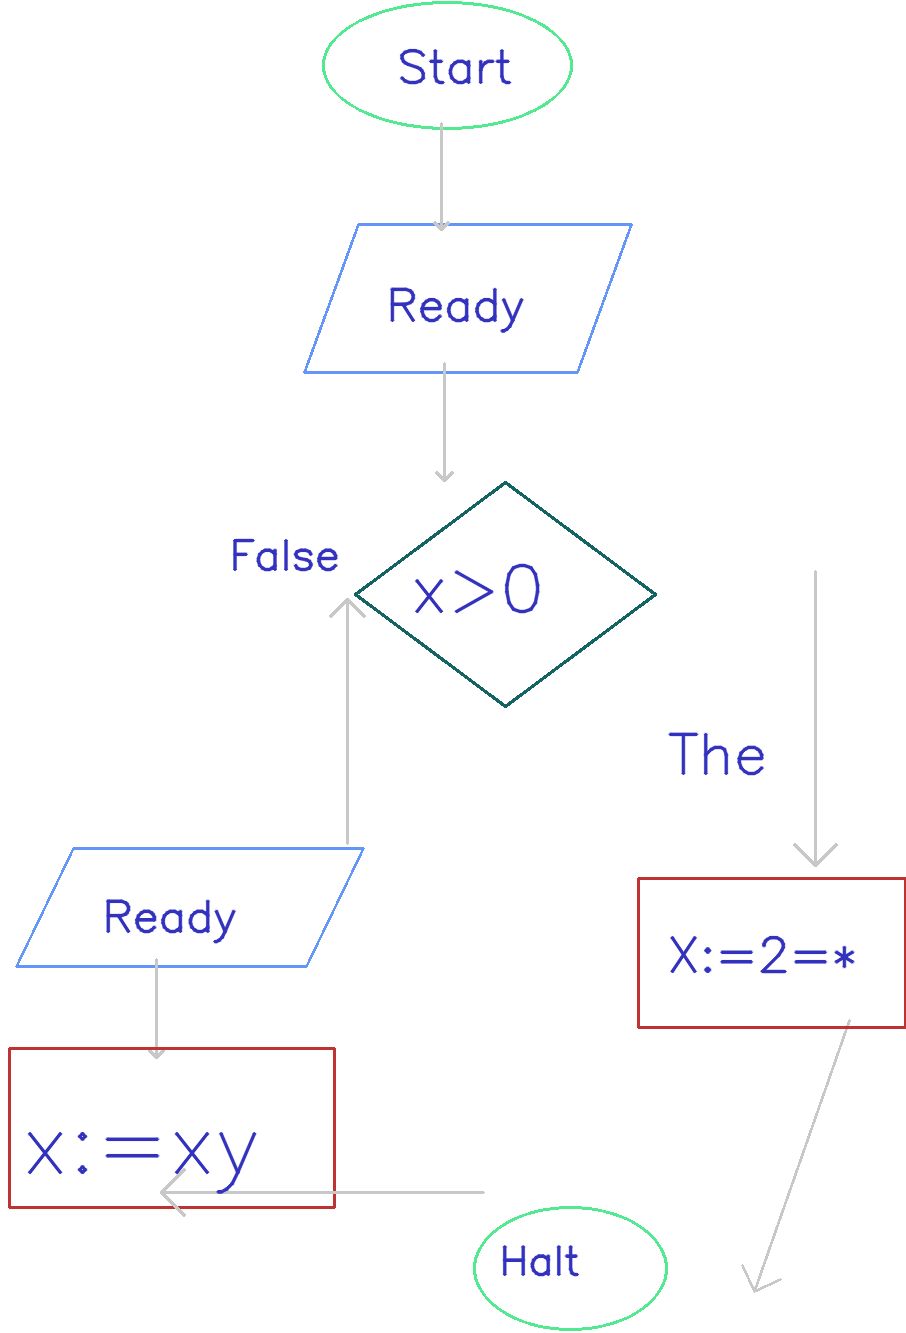

In [10]:
final_images[1]

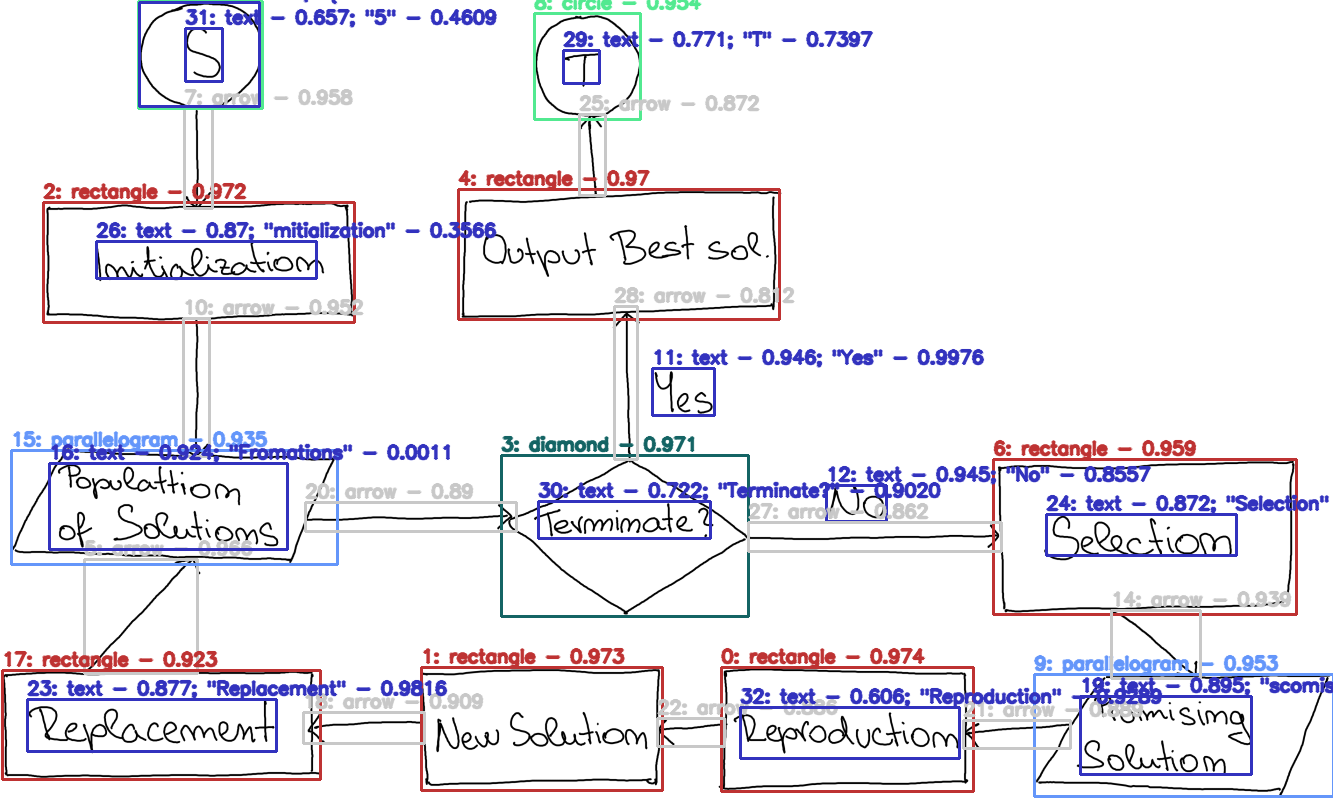

In [11]:
drawn_images[2]

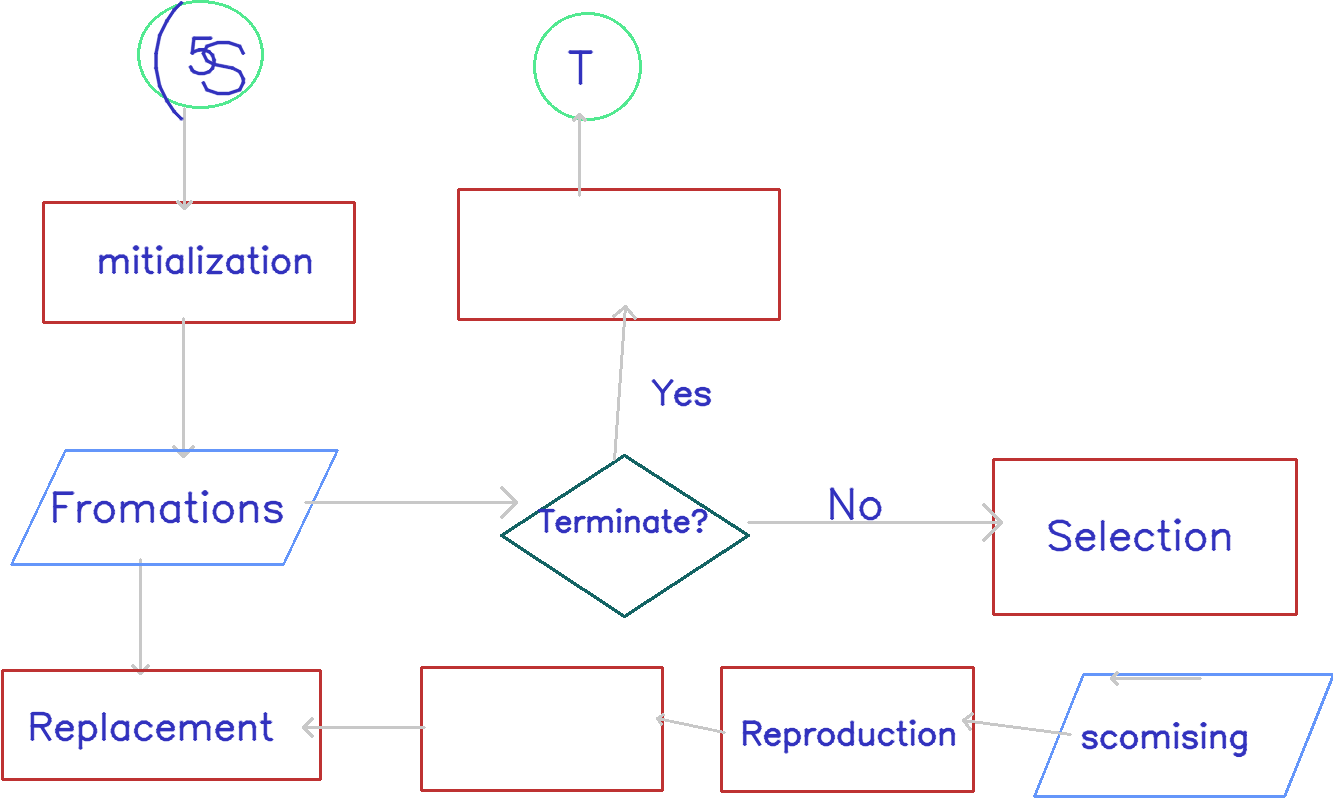

In [12]:
final_images[2]

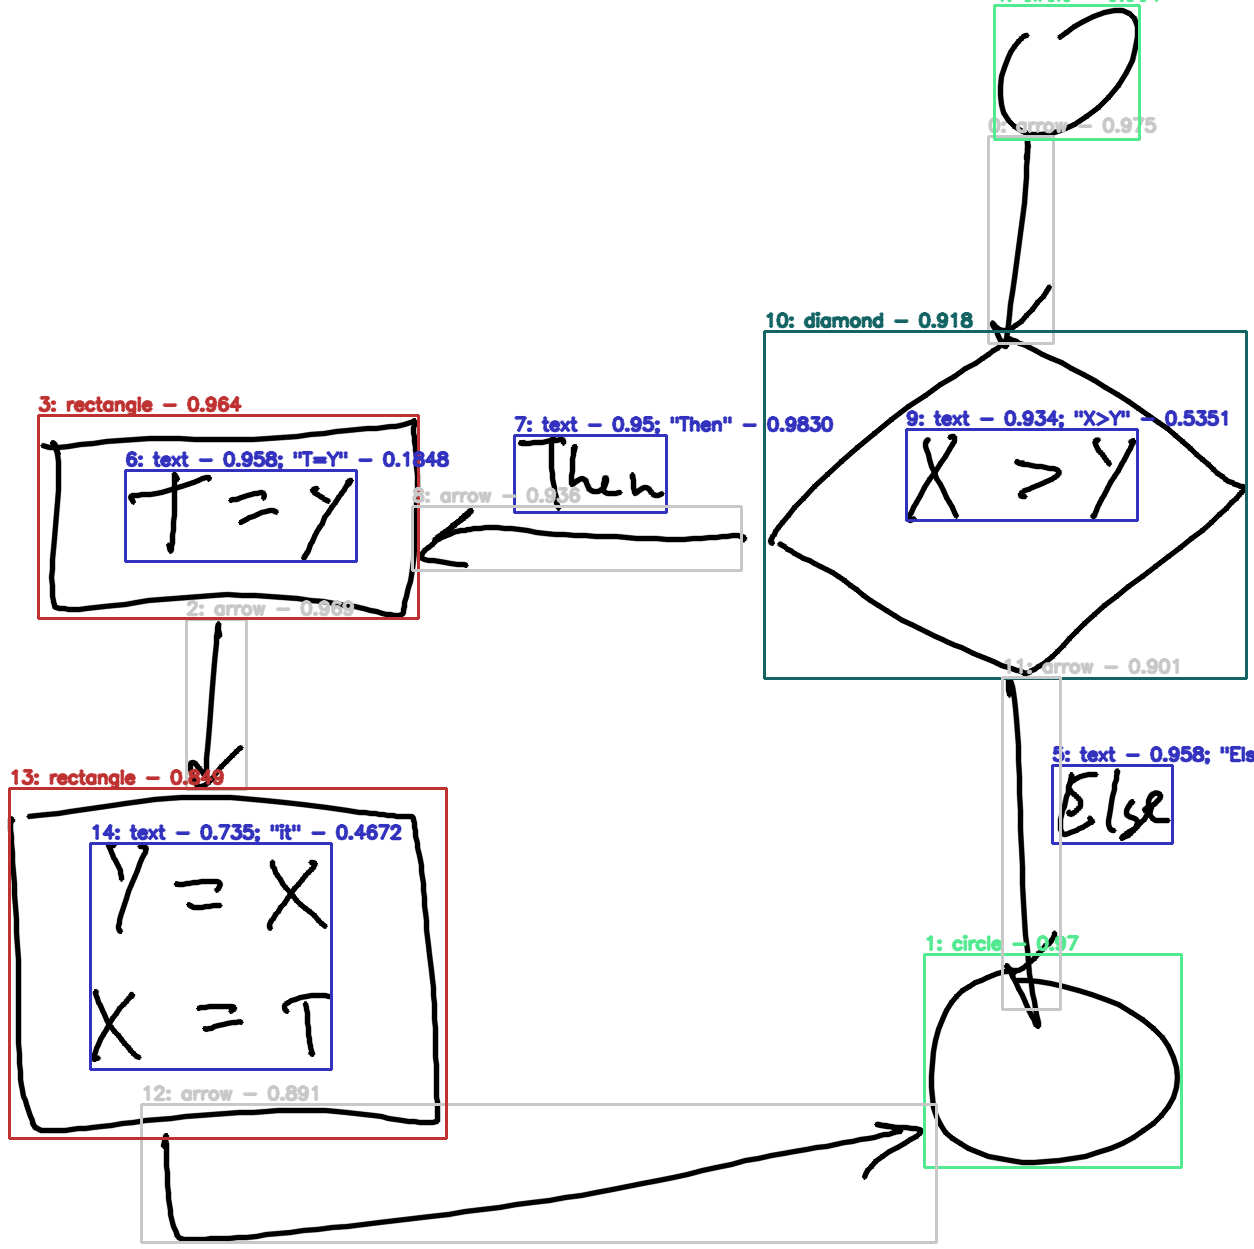

In [13]:
drawn_images[3]

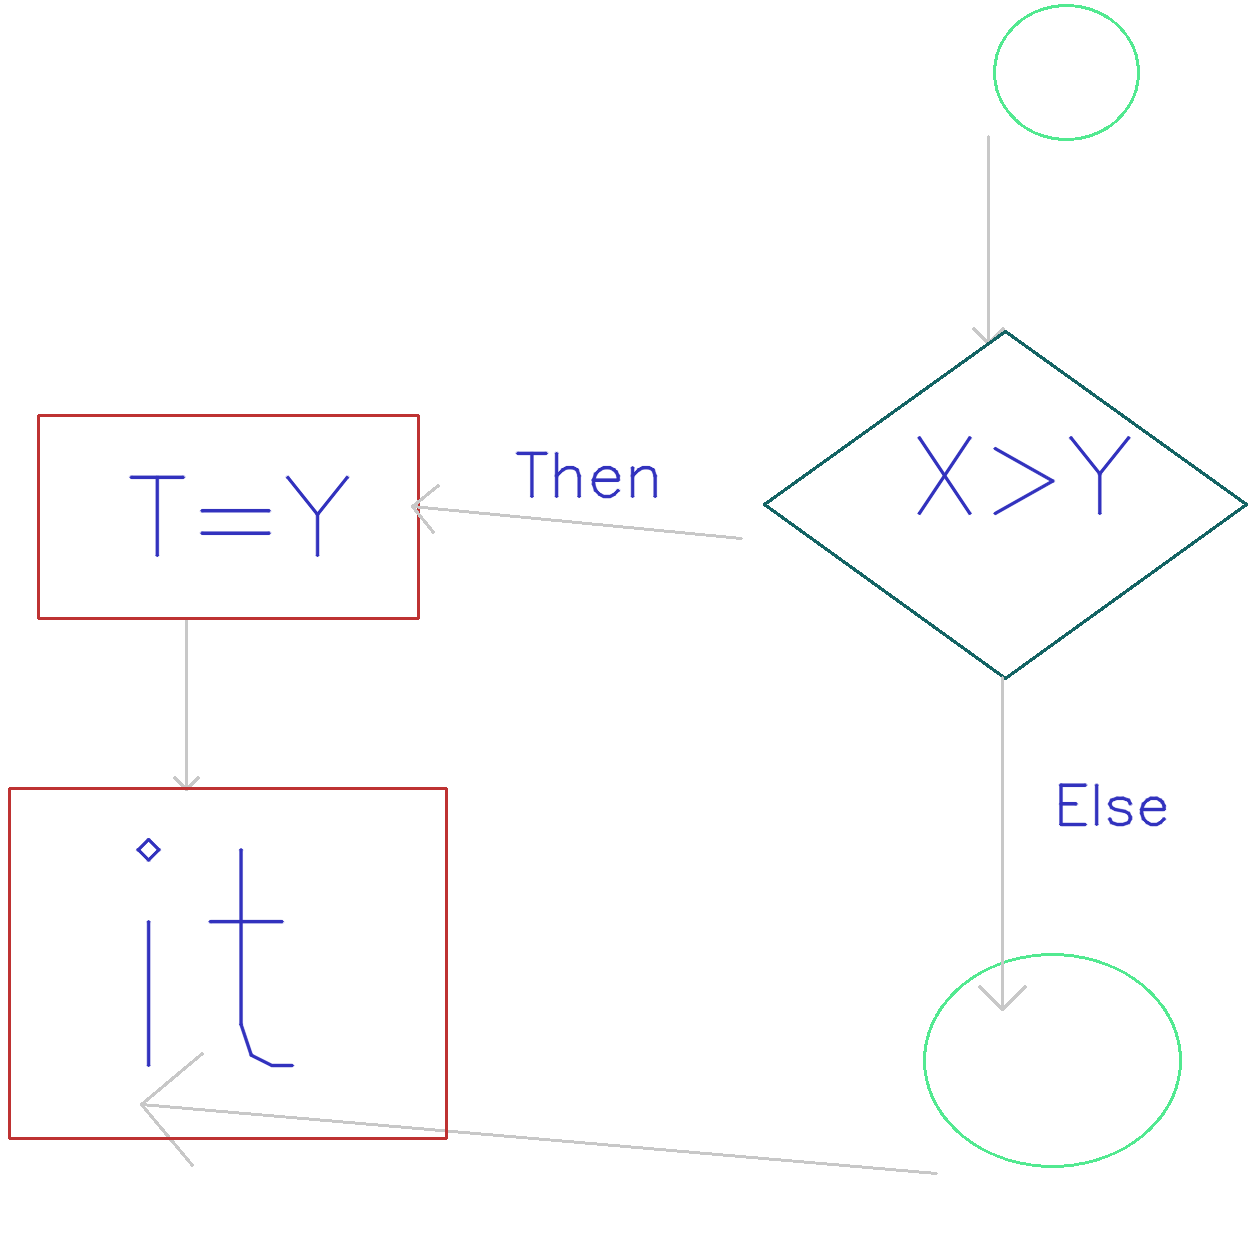

In [14]:
final_images[3]